### 1. Importación de las Librerías para el Entorno

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#### Carga de la Data

In [2]:
data = np.load('proyecto_training_data.npy')

In [3]:
dataset = pd.DataFrame(data,
                       columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt', 'LotFrontage'])

In [4]:
dataset

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### 2. Slicing

#### Data de Entrenamiento: se obtiene una muestra aleatoria del 80% de la data y se fija la semilla con random_state = 1

In [5]:
datasetE = dataset.sample(n=(round(len(dataset.index)*0.8)), random_state=1)
datasetE

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
258,231500.0,7.0,963.0,7.0,2001.0,80.0
267,179500.0,5.0,1052.0,8.0,1939.0,60.0
288,122000.0,5.0,900.0,5.0,1967.0,NaN
649,84500.0,4.0,630.0,3.0,1970.0,21.0
1233,142000.0,5.0,1188.0,6.0,1959.0,NaN
...,...,...,...,...,...,...
1317,208900.0,7.0,1352.0,5.0,2006.0,47.0
1107,274725.0,7.0,887.0,9.0,2006.0,168.0
230,148000.0,6.0,1194.0,6.0,1959.0,73.0
652,191000.0,7.0,909.0,7.0,1996.0,70.0


In [6]:
datasetE.to_csv("dataset_E.csv", encoding = 'utf-8')

### Data de Validación: se obtiene una muestra aleatoria del 20% de la data y se fija la semilla con random_state = 2

In [7]:
datasetV = dataset.sample(n=(round(len(dataset.index)*0.2)), random_state=2)
datasetV

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
503,289000.0,7.0,1801.0,6.0,1959.0,100.0
101,178000.0,6.0,977.0,7.0,1985.0,77.0
608,359100.0,8.0,1940.0,10.0,1934.0,78.0
1089,197000.0,8.0,1247.0,4.0,2005.0,37.0
819,224000.0,7.0,1358.0,6.0,2009.0,44.0
...,...,...,...,...,...,...
816,137000.0,5.0,1008.0,4.0,1954.0,NaN
1273,177000.0,6.0,1357.0,5.0,1959.0,124.0
285,164700.0,7.0,625.0,5.0,2006.0,35.0
194,127000.0,5.0,864.0,5.0,1972.0,60.0


### 3. Análisis Exploratorio de Datos

In [8]:
np.round(dataset.describe(), 2)

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.0,1460.00,1460.00,1460.00,1460.00,1201.00
mean,180921.2,6.10,1162.63,6.52,1971.27,70.05
std,79442.5,1.38,386.59,1.63,30.20,24.28
min,34900.0,1.00,334.00,2.00,1872.00,21.00
25%,129975.0,5.00,882.00,5.00,1954.00,59.00
50%,163000.0,6.00,1087.00,6.00,1973.00,69.00
75%,214000.0,7.00,1391.25,7.00,2000.00,80.00
max,755000.0,10.00,4692.00,14.00,2010.00,313.00


#### Función para obtención de las columnas del dataset

In [9]:
def getNumColNames(df):
    colnames = df.columns
    cols_num = []
    for col in colnames:
        if((df[col].dtypes == 'int64') | (df[col].dtypes == 'float64')):
            cols_num.append(col)
    return cols_num

In [10]:
cols_num = getNumColNames(dataset)
cols_num

['SalePrice',
 'OverallQual',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'YearBuilt',
 'LotFrontage']

#### Función para obtener las estadísticas de cada una de las variables cuantitativas

In [11]:
def stats (df):
    for col in cols_num:
        promedio = round(df[col].mean(),2)
        maximo = round(df[col].max(),2)
        minimo = round(df[col].min(),2)
        desviacion = round(df[col].std(),2)
        q25, q75 =df[col].quantile([.25,.75])
        rango = round(q75 - q25)
        #lista = (promedio, maximo, minimo, desviacion, rango)
        dicc = {'Media':promedio, 'Max':maximo, 'Min':minimo, 'Desv':desviacion, 'Rango':rango}
        df1 = pd.DataFrame([[key, dicc[key]] for key in dicc.keys()], columns=['Estadística', 'Valor'])
        print(f'Estadísticas de {df[col].name} {dicc}')
         #return df

#### Resumen de Estadísticas

In [12]:
stats(datasetE)

Estadísticas de SalePrice {'Media': 181132.93, 'Max': 755000.0, 'Min': 34900.0, 'Desv': 80521.21, 'Rango': 84100}
Estadísticas de OverallQual {'Media': 6.09, 'Max': 10.0, 'Min': 1.0, 'Desv': 1.4, 'Rango': 2}
Estadísticas de 1stFlrSF {'Media': 1162.14, 'Max': 4692.0, 'Min': 334.0, 'Desv': 390.87, 'Rango': 500}
Estadísticas de TotRmsAbvGrd {'Media': 6.51, 'Max': 14.0, 'Min': 2.0, 'Desv': 1.62, 'Rango': 2}
Estadísticas de YearBuilt {'Media': 1971.49, 'Max': 2010.0, 'Min': 1872.0, 'Desv': 30.25, 'Rango': 47}
Estadísticas de LotFrontage {'Media': 70.11, 'Max': 313.0, 'Min': 21.0, 'Desv': 24.61, 'Rango': 20}


### 4. Graficación de Histográmas de las Variables

In [13]:
def graphs (df, col):
     sns.set_theme(); np.random.seed(0)
     sns.set_color_codes()
     x = df[col]
     ax = sns.distplot(x,  color="k")
     rcParams['figure.figsize'] = 15,6
     plt.title("Histograma Variable "+ col, fontsize =20)
     plt.show()

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


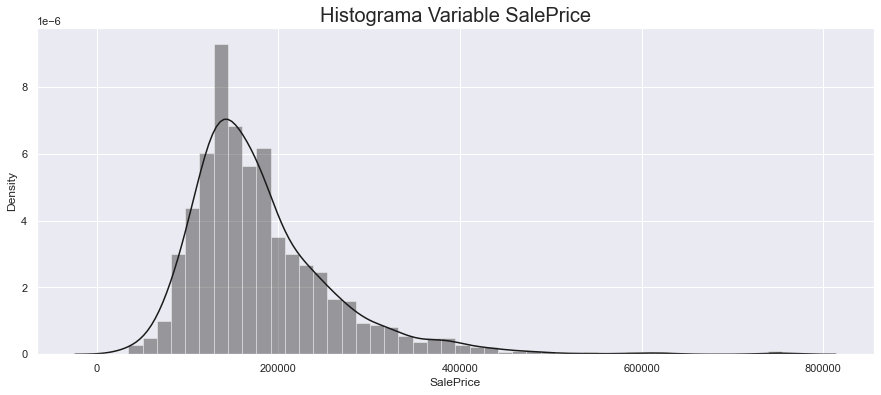

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


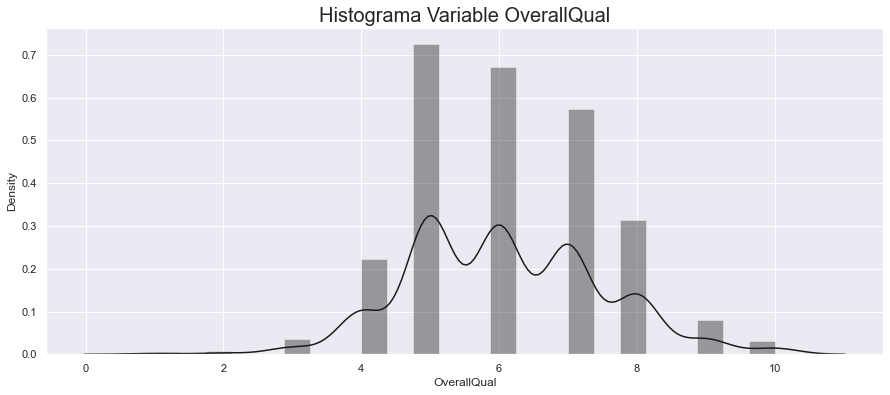

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


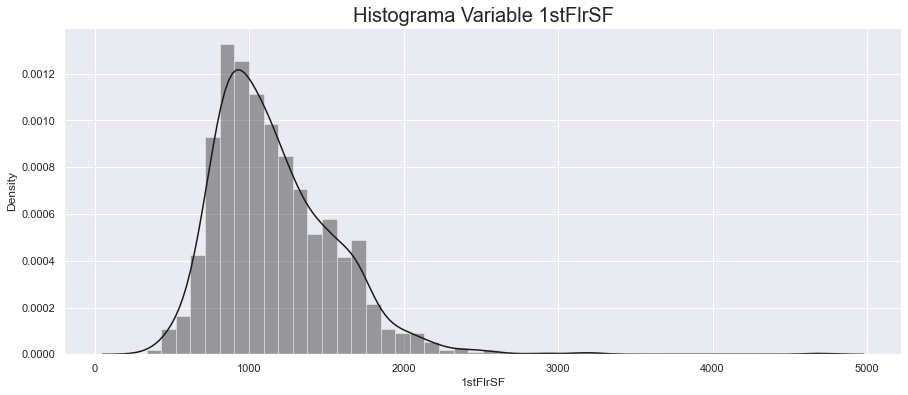

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


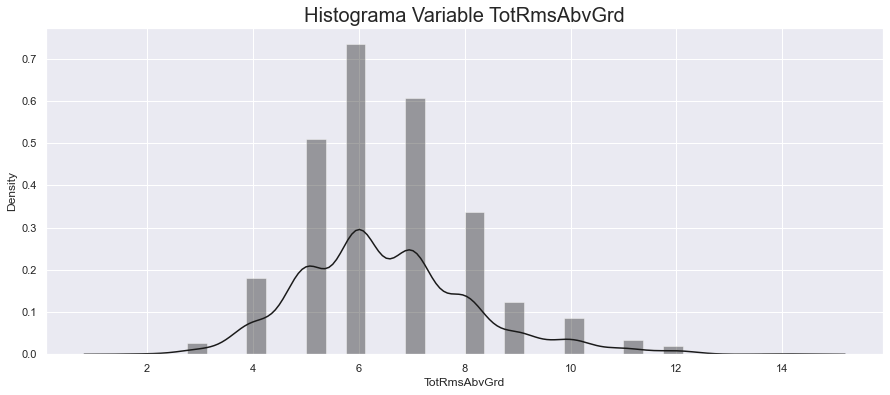

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


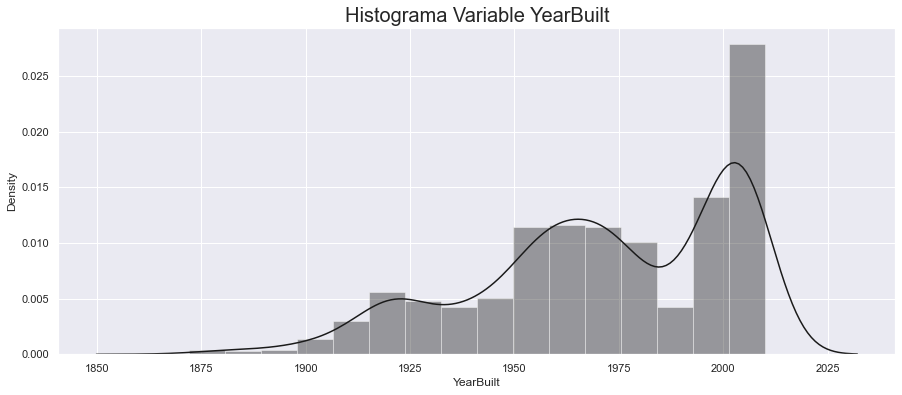

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


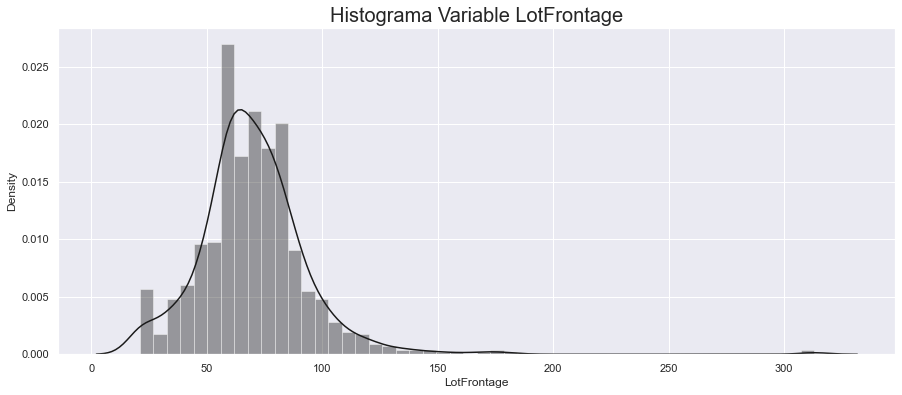

In [73]:
for col in cols_num:
    graphs(datasetE, col)

### 5. Correlación de las Variables

#### Cálculo de Correlación

In [15]:
def corr (df, col, target):
    corr = round(df[target].corr(df[col], method='pearson'),3)
    print(f"La correlación de la variable {df[col].name} es {corr}")

In [16]:
for col in cols_num:
    corr(dataset, col, "SalePrice")

La correlación de la variable SalePrice es 1.0
La correlación de la variable OverallQual es 0.791
La correlación de la variable 1stFlrSF es 0.606
La correlación de la variable TotRmsAbvGrd es 0.534
La correlación de la variable YearBuilt es 0.523
La correlación de la variable LotFrontage es 0.352


#### Graficación de las Correlaciones

In [17]:
def gdispersion(df,col,target):
    corr = round(np.corrcoef(df[col], df[target])[0,1],3)
    rng = np.random.RandomState(0)
    plt.figure(figsize = (15,6))
    plt.title("Gráfico Dispersión: "+ col + "      " + "Coeficiente de Correlación = "+ str(corr), fontsize=20)
    x = datasetE[col].values
    y = datasetE[target].values
    colors = rng.rand(1168)
    sizes = 1000 * rng.rand(1168)
    plt.scatter(x,y, c= colors, s = np.array(20)  , alpha=0.4, cmap="viridis")
    plt.colorbar(); 

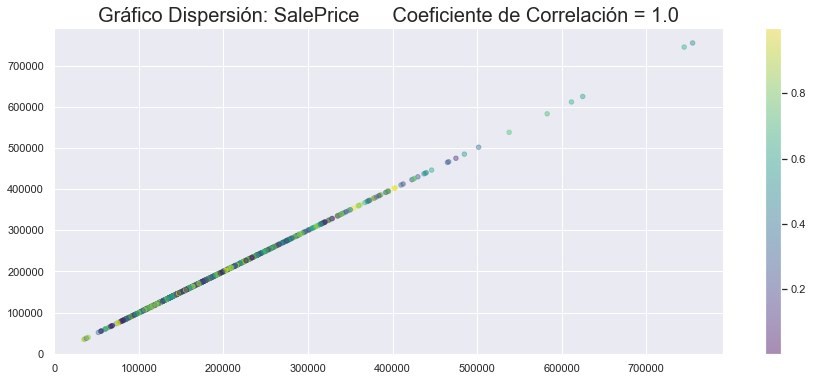

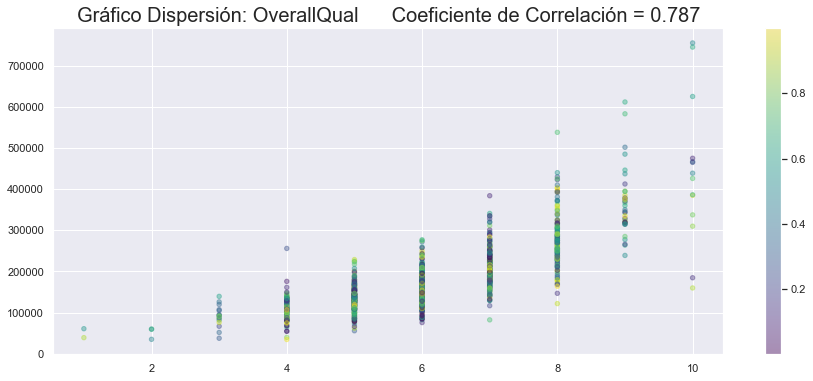

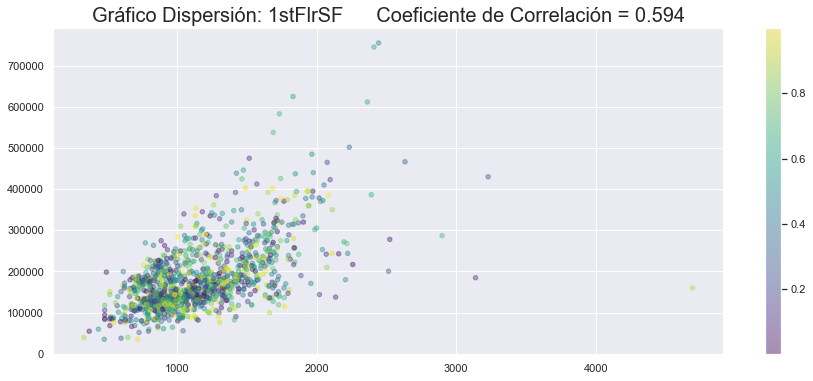

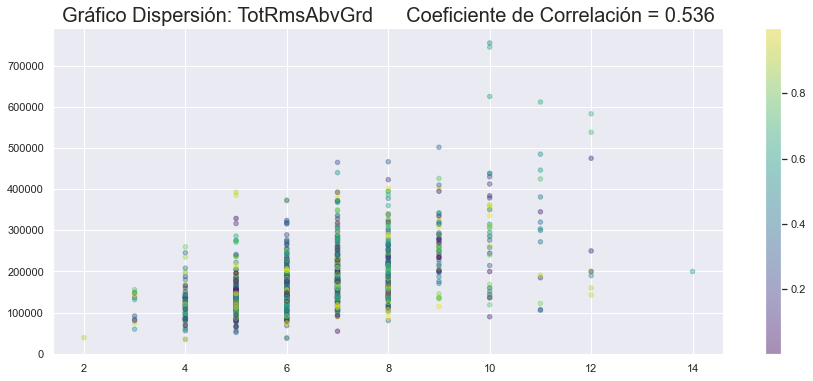

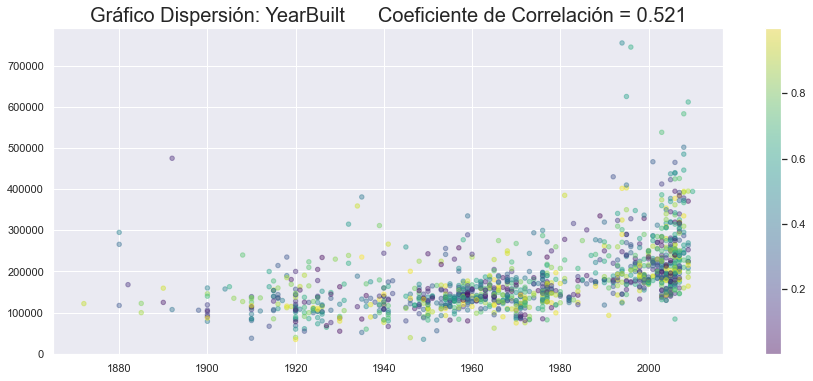

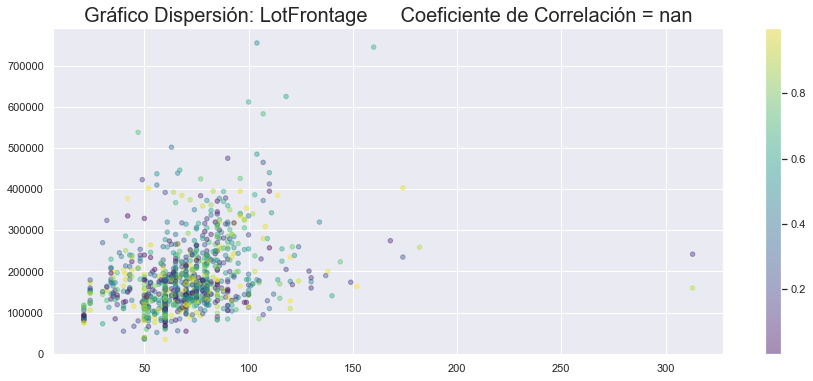

In [18]:
for col in cols_num:
    gdispersion(datasetE, col, "SalePrice")

#### Selección de las Variables con Mayor Correlación

In [19]:
def corr (df, col, target):
    dicc = {}
    #listado = []
    for col in cols_num:
        if (df[target].name == df[col].name):
            next
        else:
            corr = round(df[target].corr(df[col], method='pearson'),3)
            dicc[df[col].name] = corr
            #listado.append(corr)
    #ordenados = sorted(listado, reverse=True)
    #print(dicc)
    #print(ordenados)
    df1 = pd.DataFrame([[key, dicc[key]] for key in dicc.keys()], columns=['Variable', 'Correlación'])
    df1 = df1.sort_values('Correlación',ascending=False)
    return df1[:2]
    #print(f"La correlación de la variable {df[col].name} es {corr}")
    #return listado.sort

In [20]:
corr(datasetE, col, "SalePrice")

,Variable,Correlación
0,OverallQual,0.787
1,1stFlrSF,0.594


### 6. Parámetros de la Función

In [21]:
X = dataset.iloc[:,1:2]
y = dataset.iloc[:,0:1].values 
imprimir_error_cada = 100
learning_rate = 0.01
epochs = 10000

### 7. Función de Entrenamiento

In [22]:
def errores(X,y,betas):
    sumar = np.power(((X @ betas.T)-y),2)
    return np.sum(sumar)/(2 * len(X))

In [23]:
betas = np.zeros([1,2])
def entreno(X,y,betas,epochs,learning_rate):
    dicc1={}
    unos = np.ones([X.shape[0],1])
    X = np.concatenate((unos,X),axis=1)
    error = np.zeros(epochs)
    for i in range(epochs):
        betas = np.round(betas - (learning_rate/len(X)) * np.sum(X * (X @ betas.T - y), axis=0),2)
        beta1 = np.round(betas[0][0],2)
        beta2 = np.round(betas[0][1],2)
        error = np.round(errores(X, y, betas),2)
        if (i+1)%imprimir_error_cada == 0:
            dicc1[i] = [beta1,beta2,error]
            df1 = pd.DataFrame([[key, dicc1[key]] for key in dicc1.keys()], columns=['Iteracion', 'Modelo'])

    return df1

In [24]:
modelos = entreno(X,y,betas,epochs,learning_rate)
modelos

,Iteracion,Modelo
0,99,"[-63.21, 30424.9, 1406327596.24]"
1,199,"[-4543.17, 31124.36, 1385769210.13]"
2,299,"[-8814.32, 31791.22, 1367082345.88]"
3,399,"[-12886.52, 32427.01, 1350096106.02]"
4,499,"[-16768.96, 33033.19, 1334656020.62]"
...,...,...
95,9599,"[-95172.58, 45274.44, 1180493284.95]"
96,9699,"[-95220.71, 45281.95, 1180490910.72]"
97,9799,"[-95266.6, 45289.11, 1180488752.4]"
98,9899,"[-95310.36, 45295.96, 1180486789.98]"


Se agregan columnas con los betas y el error para su graficación

In [25]:
a =[]
b =[]
c =[]
for i in modelos.index:
    df2 = np.array_split(modelos["Modelo"][i],3)
    a.append(df2[0])
    b.append(df2[1])
    c.append(df2[2])

modelos = modelos.assign(B0 = a)
modelos = modelos.assign(B1 = b)
modelos = modelos.assign(Error =c)

modelos = pd.DataFrame(modelos,
                       columns=['Iteracion', 'B0', 'B1', 'Error'])
modelos

,Iteracion,B0,B1,Error
0,99,[-63.21],[30424.9],[1406327596.24]
1,199,[-4543.17],[31124.36],[1385769210.13]
2,299,[-8814.32],[31791.22],[1367082345.88]
3,399,[-12886.52],[32427.01],[1350096106.02]
4,499,[-16768.96],[33033.19],[1334656020.62]
...,...,...,...,...
95,9599,[-95172.58],[45274.44],[1180493284.95]
96,9699,[-95220.71],[45281.95],[1180490910.72]
97,9799,[-95266.6],[45289.11],[1180488752.4]
98,9899,[-95310.36],[45295.96],[1180486789.98]


#### Modelo Final

mdf = modelos.loc[modelos.index[-1], "B1"] * z + modelos.loc[modelos.index[-1], "B0"] 

#### Gráfica Iteración vs Error     

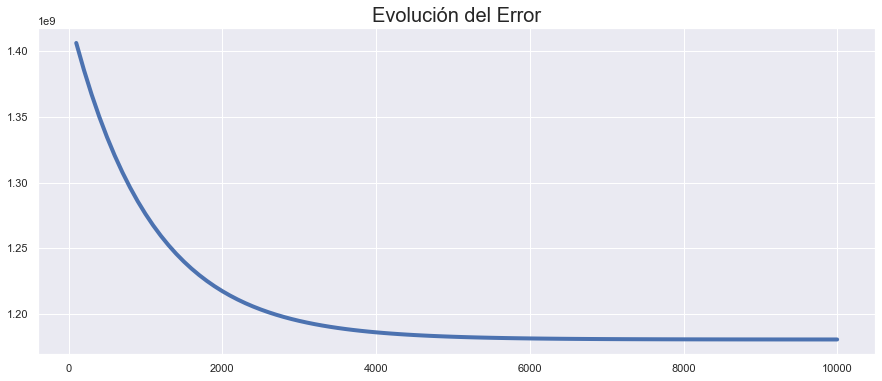

In [26]:
x = modelos["Iteracion"]
y = modelos["Error"]
plt.title("Evolución del Error", fontsize=20)
plt.plot(x,y,"b-",lw=4) 
plt.show()

#### Gráfico Evolución del Modelo

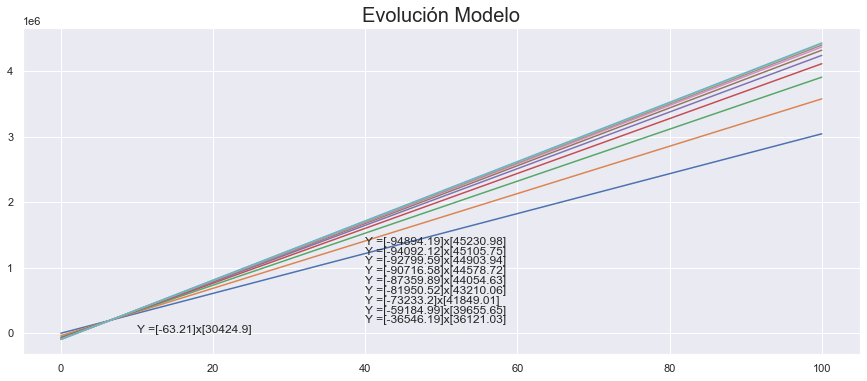

In [27]:
def h(x,b0,b1):
    b0 = modelos["B0"][0]
    b1 = modelos["B1"][0]
    y = b1*x - b0
    n = 100
    return y
x = np.linspace(0,100,1000)
plt.plot(x,h(x,modelos["B0"][0],modelos["B1"][0]))
plt.title("Evolución Modelo", fontsize= 20)
plt.text(10,500,"Y ="+str(modelos["B0"][0])+"x"+str(modelos["B1"][0]))

for i in range(1,(len(modelos)-1)):
    if (i % 10 == 0):
        x = np.linspace(0,100,1000)
        temp  = lambda x:  modelos["B1"][i]*x + modelos["B0"][i]
        plt.text(40,(15000*i),"Y ="+str(modelos["B0"][i])+"x"+str(modelos["B1"][i]))
        plt.plot(x,temp(x))

#### Epocas vs Beta 0

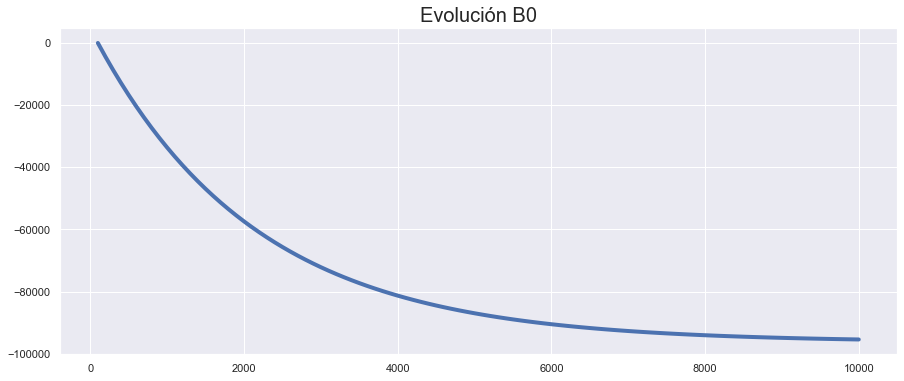

In [28]:
x = modelos["Iteracion"]
y = modelos["B0"]
plt.title("Evolución B0", fontsize=20)
plt.plot(x,y,"b-",lw=4) 
plt.show()

#### Epocas vs Beta 1

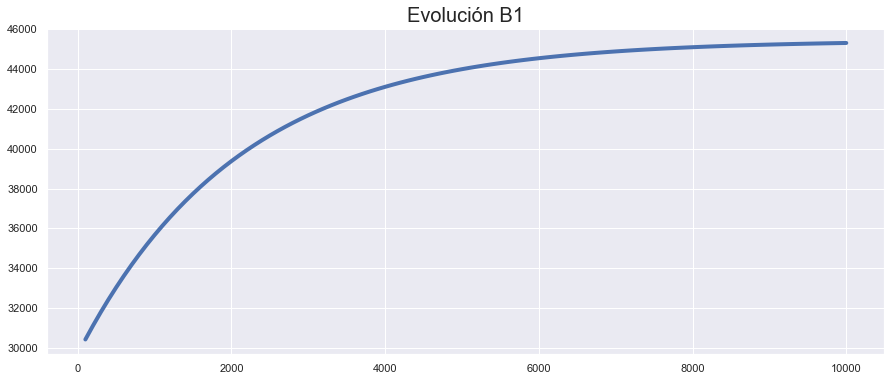

In [29]:
x = modelos["Iteracion"]
y = modelos["B1"]
plt.title("Evolución B1", fontsize=20)
plt.plot(x,y,"b-",lw=4) 
plt.show()

#### Modelo con Scikit Learn

In [30]:
LR = LinearRegression()
LR.fit(datasetE["OverallQual"].values.reshape(-1,1),datasetE["SalePrice"].values)

LinearRegression()

#### Parametros con Scikit Learn

In [31]:
LR.coef_, LR.intercept_, 

(array([45342.06225763]), -94879.11442786813)

#### R2 del modelo creado

In [32]:
LR.score(datasetE["OverallQual"].values.reshape(-1,1),datasetE["SalePrice"].values)

0.6198034459687841

#### Predicción con el modelo

In [33]:
prediccion = LR.predict(datasetE["OverallQual"].values.reshape(-1,1))

#### Graficación del modelo

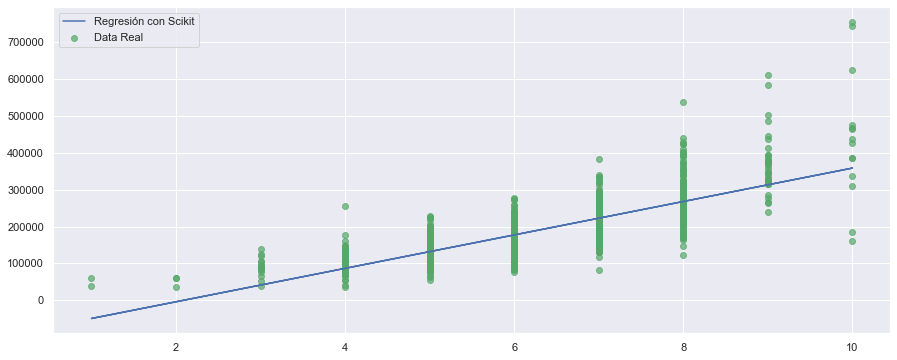

In [34]:
plt.plot(datasetE["OverallQual"], prediccion, label = "Regresión con Scikit", color="b")
plt.scatter(datasetE["OverallQual"],datasetE["SalePrice"], label = "Data Real", color ="g", alpha =0.7)
plt.legend()
plt.show()

### Función para Predicción

In [35]:
vect = [1,2,3,5]

In [36]:
def pmanual(z):
    mdf = modelos.loc[modelos.index[-1], "B1"] * z + modelos.loc[modelos.index[-1], "B0"] 
    return mdf

In [37]:
p1 = pmanual(vect)

In [38]:
def psickit(z):
    mds = np.round((LR.coef_ * z + LR.intercept_),2)
    return mds

In [39]:
p2 = psickit(vect)

In [40]:
df = pd.DataFrame((zip(p1,p2)), columns = ['Predicción Manual', 'Predicción Scikit'])
p3 = np.round(df.mean(axis=1),2)

### Comparación de las Predicciones y Promedio

In [41]:
df1 = pd.DataFrame((zip(p1,p2,p3)), columns = ['Predicción Manual', 'Predicción Scikit', 'Promedio'])
df1

,Predicción Manual,Predicción Scikit,Promedio
0,-50049.64,-49537.05,-49793.34
1,-4747.17,-4194.99,-4471.08
2,40555.30,41147.07,40851.18
3,131160.24,131831.20,131495.72


### Predicción con Data de Validación

In [42]:
vr = datasetV["SalePrice"]
pr1 = pmanual(datasetV["OverallQual"])
pr2 = psickit(datasetV["OverallQual"])
e1 = np.round((datasetV["SalePrice"]-pr1),2)
e2 = np.round((datasetV["SalePrice"]-pr2),2)

In [43]:
df2 = pd.DataFrame((zip(vr,pr1,pr2,e1,e2)), columns = ['Valor Real','Predicción Manual', 'Predicción Scikit', 'Error Manual', 'Error Scikit'])
df2

,Valor Real,Predicción Manual,Predicción Scikit,Error Manual,Error Scikit
0,289000.0,221765.18,222515.32,67234.82,66484.68
1,178000.0,176462.71,177173.26,1537.29,826.74
2,359100.0,267067.65,267857.38,92032.35,91242.62
3,197000.0,267067.65,267857.38,-70067.65,-70857.38
4,224000.0,221765.18,222515.32,2234.82,1484.68
...,...,...,...,...,...
287,137000.0,131160.24,131831.20,5839.76,5168.80
288,177000.0,176462.71,177173.26,537.29,-173.26
289,164700.0,221765.18,222515.32,-57065.18,-57815.32
290,127000.0,131160.24,131831.20,-4160.24,-4831.20


In [44]:
np.mean(df2["Error Manual"]), np.mean(df2["Error Scikit"]), np.sum(df2["Error Manual"]), np.sum(df2["Error Scikit"])

(-313.1718150684904,
 -1031.1784931506793,
 -91446.16999999946,
 -301104.12000000034)

#### Graficación del Error con la Función Manual

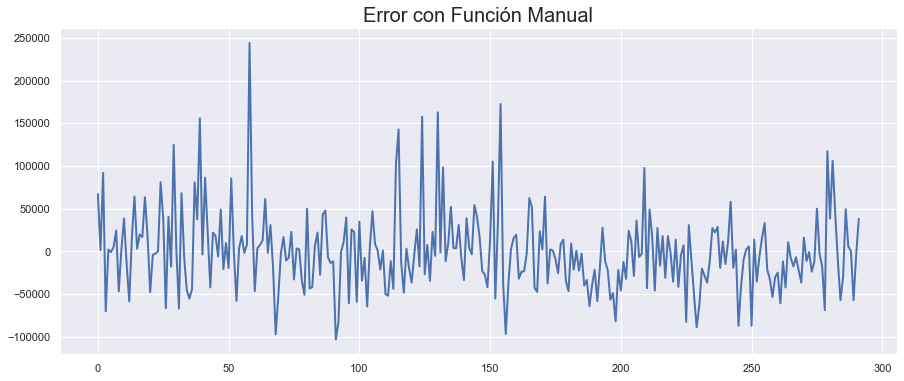

In [45]:
x = df2.index
y = df2["Error Manual"]
plt.title("Error con Función Manual", fontsize=20)
plt.plot(x,y,"b-",lw=2) 
plt.show()

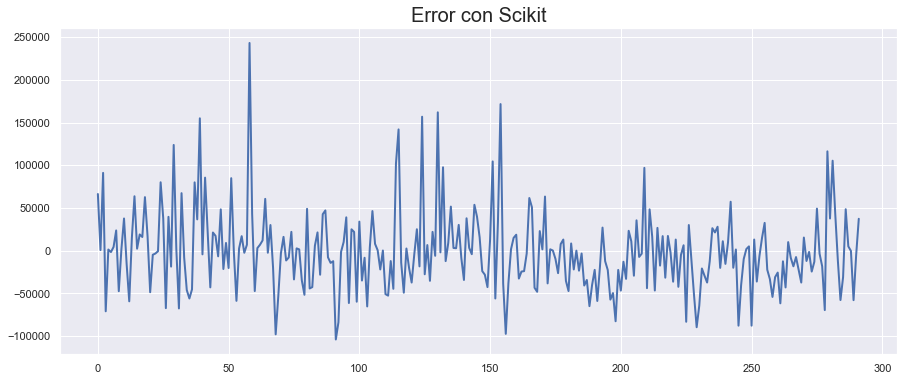

In [46]:
x = df2.index
z = df2["Error Scikit"]
plt.title("Error con Scikit", fontsize=20)
plt.plot(x,z,"b-",lw=2) 
plt.show()

### Conclusión

#### Para la primera variable se concluye que el mejor metodo es el metodo manual porque tiene menos error

### 6. Parámetros de la Función

In [47]:
X = np.log(dataset.iloc[:,2:3])
y = dataset.iloc[:,0:1].values 
imprimir_error_cada = 100
learning_rate = 0.01
epochs = 5000

### 7. Función de Entrenamiento

In [48]:
def errores(X,y,betas):
    sumar = np.power(((X @ betas.T)-y),2)
    return np.sum(sumar)/(2 * len(X))

In [49]:
def entreno(X,y,betas,epochs,learning_rate):
    dicc1={}
    unos = np.ones([X.shape[0],1])
    X = np.concatenate((unos,X),axis=1)
    betas = np.zeros([1,2])
    error = np.zeros(epochs)
    for i in range(epochs):
        betas = np.round(betas - (learning_rate/len(X)) * np.sum(X * (X @ betas.T - y), axis=0),2)
        beta1 = np.round(betas[0][0],2)
        beta2 = np.round(betas[0][1],2)
        error = np.round(errores(X, y, betas),2)
        if (i+1)%imprimir_error_cada == 0:
            dicc1[i] = [beta1,beta2,error]
            df1 = pd.DataFrame([[key, dicc1[key]] for key in dicc1.keys()], columns=['Iteracion', 'Modelo'])

    return df1

In [50]:
modelos = entreno(X,y,betas,epochs,learning_rate)

In [51]:
a =[]
b =[]
c =[]
for i in modelos.index:
    df2 = np.array_split(modelos["Modelo"][i],3)
    a.append(df2[0])
    b.append(df2[1])
    c.append(df2[2])

modelos = modelos.assign(B0 = a)
modelos = modelos.assign(B1 = b)
modelos = modelos.assign(Error =c)

modelos = pd.DataFrame(modelos,
                       columns=['Iteracion', 'B0', 'B1', 'Error'])
modelos

,Iteracion,B0,B1,Error
0,99,[1914.32],[25790.77],[2803784131.35]
1,199,[194.01],[26035.78],[2800764697.56]
2,299,[-1522.8],[26280.28],[2797757458.76]
3,399,[-3236.19],[26524.3],[2794762233.72]
4,499,[-4946.14],[26767.82],[2791779025.44]
5,599,[-6652.66],[27010.86],[2788807775.83]
6,699,[-8355.78],[27253.41],[2785848400.27]
7,799,[-10055.41],[27495.47],[2782901015.96]
8,899,[-11751.71],[27737.05],[2779965312.88]
9,999,[-13444.52],[27978.14],[2777041529.28]


#### Modelo Final

mdf = modelos.loc[modelos.index[-1], "B1"] * z + modelos.loc[modelos.index[-1], "B0"]

#### Gráfica Iteración vs Error     

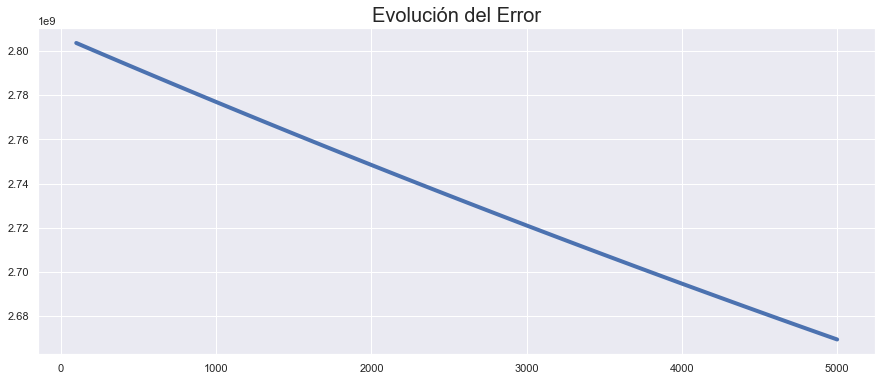

In [52]:
x = modelos["Iteracion"]
y = modelos["Error"]
plt.title("Evolución del Error", fontsize=20)
plt.plot(x,y,"b-",lw=4) 
plt.show()

#### Gráfico Evolución del Modelo

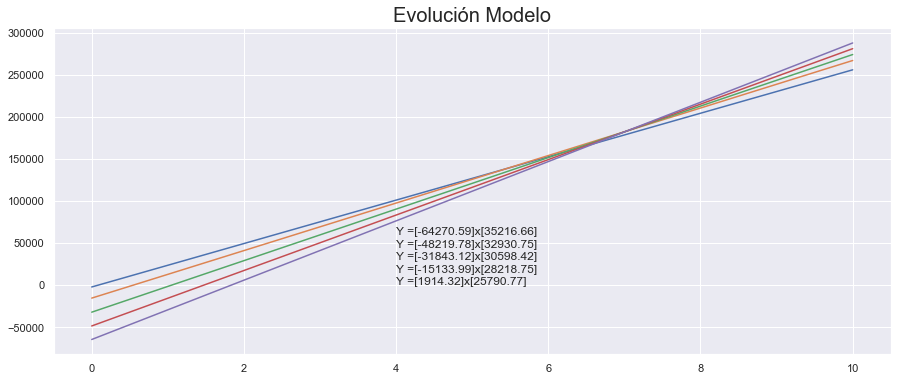

In [53]:
def h(x,b0,b1):
    b0 = modelos["B0"][0]
    b1 = modelos["B1"][0]
    y = b1*x - b0
    n = 20
    return y
x = np.linspace(0,10,100)
plt.plot(x,h(x,modelos["B0"][0],modelos["B1"][0]))
plt.title("Evolución Modelo", fontsize= 20)
plt.text(4,200,"Y ="+str(modelos["B0"][0])+"x"+str(modelos["B1"][0]))

for i in range(1,(len(modelos)-1)):
    if (i % 10 == 0):
        x = np.linspace(0,10,100)
        temp  = lambda x:  modelos["B1"][i]*x + modelos["B0"][i]
        plt.text(4,(1500*i),"Y ="+str(modelos["B0"][i])+"x"+str(modelos["B1"][i]))
        plt.plot(x,temp(x))

#### Epocas vs Beta 0

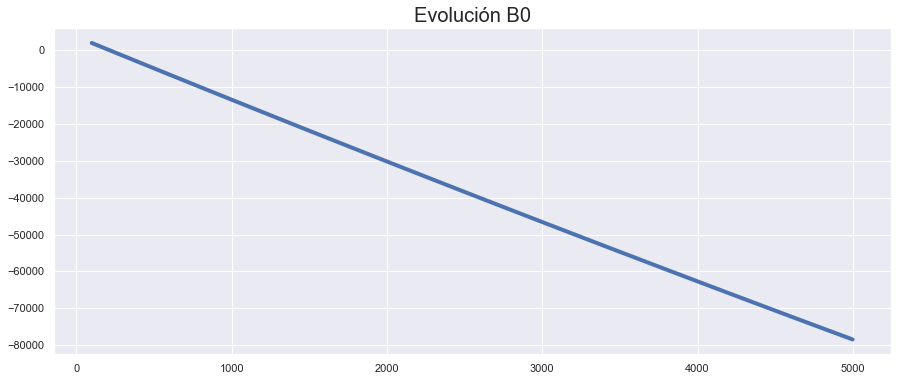

In [54]:
x = modelos["Iteracion"]
y = modelos["B0"]
plt.title("Evolución B0", fontsize=20)
plt.plot(x,y,"b-",lw=4) 
plt.show()

#### Epocas vs Beta 1

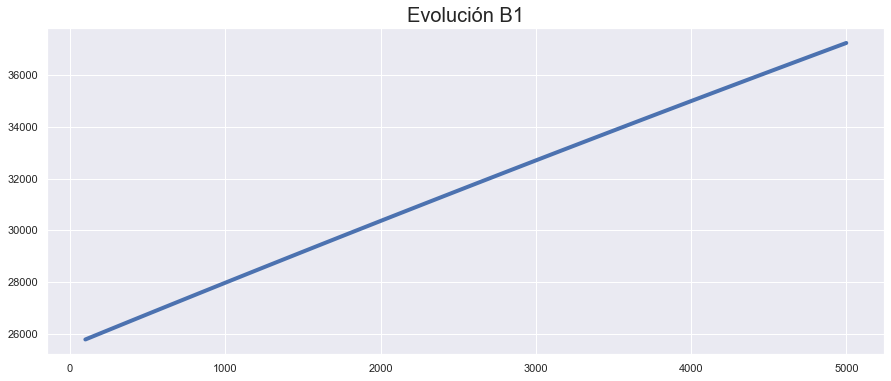

In [55]:
x = modelos["Iteracion"]
y = modelos["B1"]
plt.title("Evolución B1", fontsize=20)
plt.plot(x,y,"b-",lw=4) 
plt.show()

#### Modelo con Scikit Learn

In [56]:
LR = LinearRegression()
LR.fit(datasetE["1stFlrSF"].values.reshape(-1,1),datasetE["SalePrice"].values)

LinearRegression()

#### Parametros con Scikit Learn

In [57]:
LR.coef_, LR.intercept_,

(array([122.36265127]), 38930.972261322255)

#### R2 del modelo creado

In [58]:
LR.score(datasetE["1stFlrSF"].values.reshape(-1,1),datasetE["SalePrice"].values)

0.3528070087871287

In [59]:
prediccion = LR.predict(datasetE["1stFlrSF"].values.reshape(-1,1))

#### Graficación del modelo

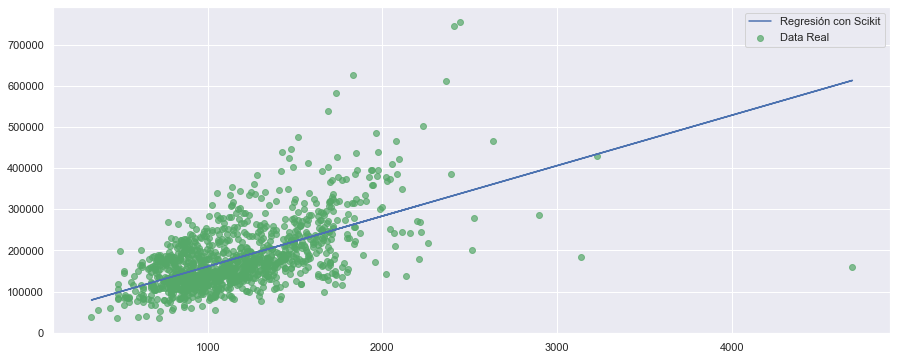

In [60]:
plt.plot(datasetE["1stFlrSF"], prediccion, label = "Regresión con Scikit", color="b")
plt.scatter(datasetE["1stFlrSF"],datasetE["SalePrice"], label = "Data Real", color ="g", alpha =0.7)
plt.legend()
plt.show()

### Función para Predicción

In [61]:
vect = [1,2,3,5]

In [62]:
def pmanual(z):
    mdf = modelos.loc[modelos.index[-1], "B1"] * z + modelos.loc[modelos.index[-1], "B0"] 
    return mdf

In [63]:
p1 = pmanual(vect)

In [64]:
def psickit(z):
    mds = np.round((LR.coef_ * z + LR.intercept_),2)
    return mds

In [65]:
p2 = psickit(vect)

In [66]:
df = pd.DataFrame((zip(p1,p2)), columns = ['Predicción Manual', 'Predicción Scikit'])
p3 = np.round(df.mean(axis=1),2)

### Comparación de las Predicciones y Promedio

In [67]:
df1 = pd.DataFrame((zip(p1,p2,p3)), columns = ['Predicción Manual', 'Predicción Scikit', 'Promedio'])
df1

,Predicción Manual,Predicción Scikit,Promedio
0,-41208.16,39053.33,-1077.42
1,-3973.07,39175.70,17601.31
2,33262.02,39298.06,36280.04
3,107732.20,39542.79,73637.50


### Predicción con Data de Validación

In [68]:
vr = datasetV["SalePrice"]
pr1 = pmanual(np.log(datasetV["1stFlrSF"]))
pr2 = psickit(datasetV["1stFlrSF"])
e1 = np.round((datasetV["SalePrice"]-pr1),2)
e2 = np.round((datasetV["SalePrice"]-pr2),2)

In [69]:
df2 = pd.DataFrame((zip(vr,pr1,pr2,e1,e2)), columns = ['Valor Real','Predicción Manual', 'Predicción Scikit', 'Error Manual', 'Error Scikit'])
df2

,Valor Real,Predicción Manual,Predicción Scikit,Error Manual,Error Scikit
0,289000.0,200674.609296,259306.11,88325.39,29693.89
1,178000.0,177901.230093,158479.28,98.77,19520.72
2,359100.0,203442.885830,276314.52,155657.11,82785.48
3,197000.0,186986.938102,191517.20,10013.06,5482.80
4,224000.0,190162.062192,205099.45,33837.94,18900.55
...,...,...,...,...,...
287,137000.0,179064.335025,162272.52,-42064.34,-25272.52
288,177000.0,190134.633027,204977.09,-13134.63,-27977.09
289,164700.0,161267.012076,115407.63,3432.99,49292.37
290,127000.0,173324.520588,144652.30,-46324.52,-17652.30


In [70]:
np.mean(df2["Error Manual"]), np.mean(df2["Error Scikit"]), np.sum(df2["Error Manual"]), np.sum(df2["Error Scikit"])

(1709.7350684931441, 1281.0841780821931, 499242.6399999999, 374076.57999999984)

#### Graficación del Error con la Función Manual

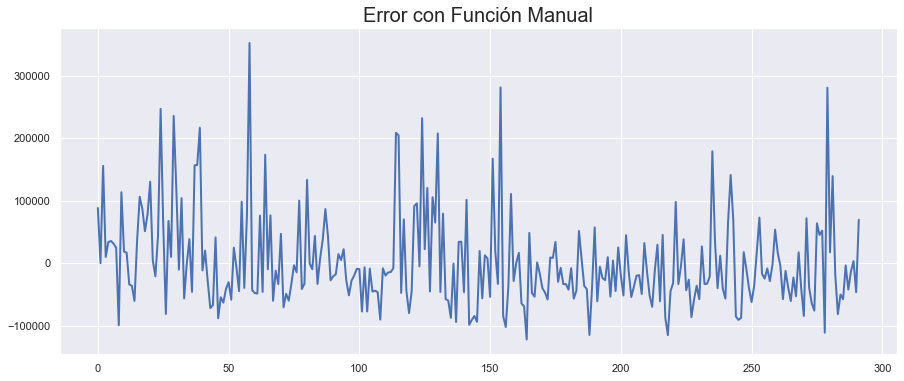

In [71]:
x = df2.index
y = df2["Error Manual"]
plt.title("Error con Función Manual", fontsize=20)
plt.plot(x,y,"b-",lw=2) 
plt.show()

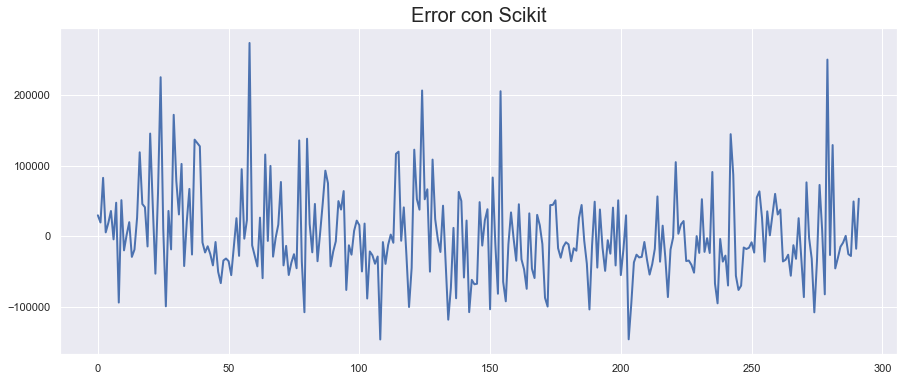

In [72]:
x = df2.index
z = df2["Error Scikit"]
plt.title("Error con Scikit", fontsize=20)
plt.plot(x,z,"b-",lw=2) 
plt.show()

### Conclusión

#### Para la segunda variable se concluye que la mejor es con Scikit pues el error es menor